# Duffing — Data generation walkthrough
This notebook demonstrates how to generate small synthetic datasets of Duffing trajectories using the project utilities, inspect the resulting CSV, and visualize example runs.

## Prerequisites
Install dependencies from `requirements.txt` if you haven't already. Example (run in terminal):
```
pip install -r requirements.txt
```
(Optional) Create and use a virtual environment for reproducibility.

In [2]:
# Notebook-friendly imports: ensure project root is on sys.path so local `duffing` package imports work
import sys, os
# compute project root (one level up from notebooks/)
proj_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from duffing.generate_data import generate_dataset
from duffing.plot_sample import plot_from_params
print('python', sys.version.split()[0])
print('numpy', np.__version__)
print('pandas', pd.__version__)

python 3.11.9
numpy 2.3.3
pandas 2.3.3


## Generate a small dataset
We'll create a tiny dataset with a few random base parameter sets and a short gamma sweep so you can inspect results quickly.

In [3]:
# Generate a tiny dataset (fast)
df = generate_dataset(n_param_sets=3, out_csv='demo_small.csv', rng_seed=1, gamma_start=0.1, gamma_end=1.5, gamma_steps=8)
df.shape

param sets: 100%|██████████| 3/3 [00:07<00:00,  2.54s/it]


(24, 14)

In [4]:
# Inspect the CSV head
df.head()

,delta,alpha,beta,omega,gamma,x_mean,x_rms,x_max,x_min,x_std,dom_freq,periodic,label_gamma,base_id
0,0.28032,0.900927,0.14416,1.448649,0.1,-0.000072,0.058430,0.148875,-0.161605,0.058430,0.229954,True,0.1,0
1,0.28032,0.900927,0.14416,1.448649,0.3,-0.000544,0.171269,0.376199,-0.369760,0.171268,0.229954,True,0.3,0
2,0.28032,0.900927,0.14416,1.448649,0.5,-0.001015,0.286771,0.609775,-0.577396,0.286769,0.229954,True,0.5,0
3,0.28032,0.900927,0.14416,1.448649,0.7,-0.001487,0.406388,0.851272,-0.783037,0.406385,0.229954,True,0.7,0
4,0.28032,0.900927,0.14416,1.448649,0.9,-0.001968,0.532581,1.101802,-0.985872,0.532577,0.229954,True,0.9,0


In [5]:
# Ensure grouping by base params exists and pick a sample to plot
if 'base_id' not in df.columns:
    df['base_id'] = df.groupby(['delta','alpha','beta','omega']).ngroup()
print('base ids:', sorted(df['base_id'].unique()))
row = df.iloc[5]
params = {k: float(row[k]) for k in ['delta','alpha','beta','omega','gamma']}
print(params)

base ids: [np.int64(0), np.int64(1), np.int64(2)]
{'delta': 0.28031973111511554, 'alpha': 0.9009273926518706, 'beta': 0.14415961271963373, 'omega': 1.4486494471372438, 'gamma': 1.0999999999999999}


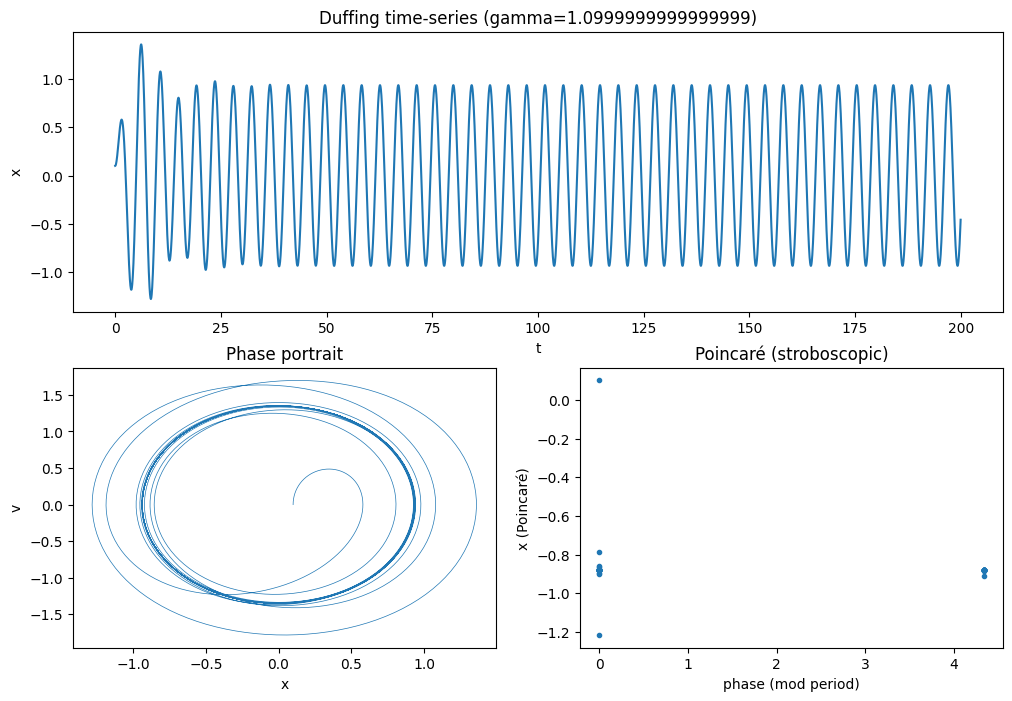

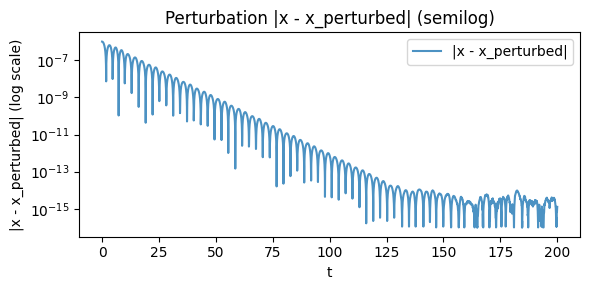

In [6]:
# Visualize the sample (this will open matplotlib windows in the notebook)
plot_from_params(params, t_span=(0,200))

## Notes
- To scale up: increase `n_param_sets` and `gamma_steps` and consider parallel generation.
- Generated CSV is saved in the current working directory as `demo_small.csv`.
- Next notebooks show analysis (Lyapunov & classification) and bifurcation construction.